In [2]:
# Importing Pandas for Dataframe Manipulation as well as Matplotlib and Seaborn for visualization purposes.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Reading in our CSV and renaming columns for further clarity.
df = pd.read_csv("Salary_Data.csv")
df.columns = ["Years Experience", "Salary"]

# Printing out the first five rows of our dataframe!
df.head()

,Years Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [33]:
# Accessing various statistics regarding our data with the "describe" function.
df.describe()

,Years Experience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [100]:
# Checking for any null or missing values in our dataframe.
df.isnull()

,Years Experience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


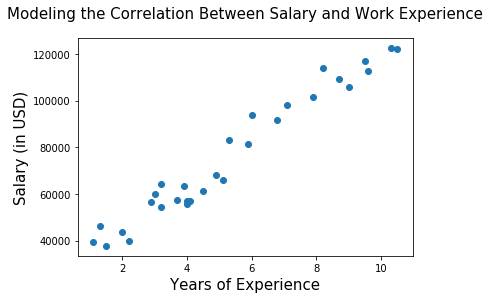

In [116]:
# Modeling the correlation between salary and work experience with a scatter plot.
plt.scatter(df["Years Experience"], df["Salary"])

# Adding metadata to our plot for increased readability.
plt.title("Modeling the Correlation Between Salary and Work Experience", pad=20, fontsize=15)
plt.xlabel("Years of Experience", fontsize=15)
plt.ylabel("Salary (in USD)", fontsize=15)

plt.show()

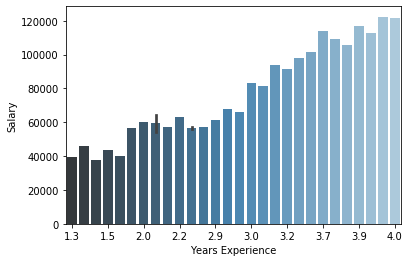

In [4]:
# Importing Ticker for Spacing Purposes.
import matplotlib.ticker as ticker

# Creating a new Barplot responsible for displaying the relationship between work experience and salary.
ax = sns.barplot(df["Years Experience"], df["Salary"], palette="Blues_d")

# Adding spacing on the x-axis for readability.
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

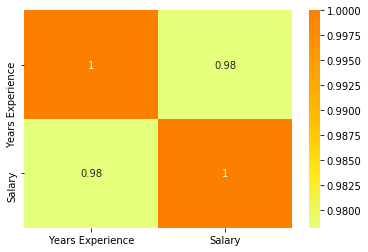

In [25]:
# Viewing the correlation between our independent and dependent variables with a Seaborn Heatmap.
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [29]:
# Importing "train_test_split" from Scikit-Learn's 'model_selection' package.
from sklearn.model_selection import train_test_split

# Partitioning our overall dataset into X and Y portions, respectively.
x_data = df["Years Experience"]
y_data = df["Salary"]

# Creating our X and Y train-test sets with a call to "train_test_split".
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [32]:
# Visualizing our 80-20 split with a couple of print statements!

print("80% of Dataset: " + str(0.8 * len(df)))
print("Length of Training Set: " + str(len(x_train)))
print()

print("20% of Dataset: " + str(0.2 * len(df)))
print("Length of Testing Set: " + str(len(x_test)))

80% of Dataset: 24.0
Length of Training Set: 24

20% of Dataset: 6.0
Length of Testing Set: 6


In [43]:
# Importing the Linear Regression Object.
from sklearn.linear_model import LinearRegression

# Declaring and instantiating a new Linear Regression Object.
classifier = LinearRegression()

# Fitting our regression model to the X and Y training data.
classifier.fit(x_train.to_frame(), y_train.to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Making predictions with our newly-trained model.
predictions = classifier.predict(x_test.to_frame())
print(predictions)

[[108503.88791943]
 [ 56252.05388439]
 [ 44851.65373129]
 [ 36301.35361646]
 [125604.48814908]
 [ 63852.32065312]]


In [105]:
# Printing the coefficient (slope) of our regression line.
print("Model Coefficient: ")
print(classifier.coef_)

print()

# Printing the y-intercept (b-value) of our regression line.
print("Model Intercept: ")
print(classifier.intercept_)

Model Coefficient: 
[[9500.33346092]]

Model Intercept: 
[25850.98680946]


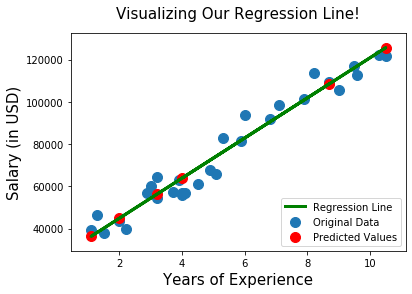

In [115]:
# Plotting the original data against the model's predicted values.
plt.scatter(df["Years Experience"], df["Salary"], s=100)
plt.scatter(x_test, predictions, color="red", s=100)

# Plotting the regression line in a different color.
plt.plot(x_test, predictions, color="green", linewidth=3)

# Adding metadata (axis labels, title, and legend) to our plot for increased readability.
plt.xlabel("Years of Experience", fontsize=15)
plt.ylabel("Salary (in USD)", fontsize=15)
plt.title("Visualizing Our Regression Line!", pad=15, fontsize=15)
plt.legend(["Regression Line", "Original Data", "Predicted Values"], loc="lower right")

plt.show()

In [109]:
from sklearn import metrics

# Printing out the MSE and Model Accuracy Measure for our regression model.
print("Mean Squared Error (MSE): " + str(metrics.mean_absolute_error(y_test, predictions)))
print("Model Accuracy Measure: " + str(classifier.score(x_test.to_frame(), y_test.to_frame())))

Mean Squared Error (MSE): 2955.0458136642533
Model Accuracy Measure: 0.987825958572787
